## Importing dependencies

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [64]:
#loading the training dataset
train_df = pd.read_excel(r'Dataset/Data_Train.xlsx')

## Browsing the dataset

In [65]:
# Peeking the dataset
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [66]:
#checking the datatypes of the columns of the dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [67]:
#checking the shape of the dataset.
train_df.shape

(10683, 11)

In [68]:
#checking the statistical descirption of the dataset.
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [69]:
# check for the null values.
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### As per the observations there are some null values found in the Route and Total_Stops column so we have to remove it using the dropna() function.

In [70]:
# Dropping the null values.
train_df.dropna(inplace=True)

In [71]:
# checking for the numerical & categorical columns
numeric_features=[feature for feature in train_df.columns if train_df[feature].dtype != 'O']
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtype == 'O']
#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')  

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [72]:
#Checking for the top 10 Airlines on basis of number of bookings
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [73]:
# Checking the maximum ticket Price by each Airline.
train_df.groupby('Airline').Price.max().to_frame().sort_values('Price',ascending=False)[0:10]

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


#### Airline VS Price Analysis

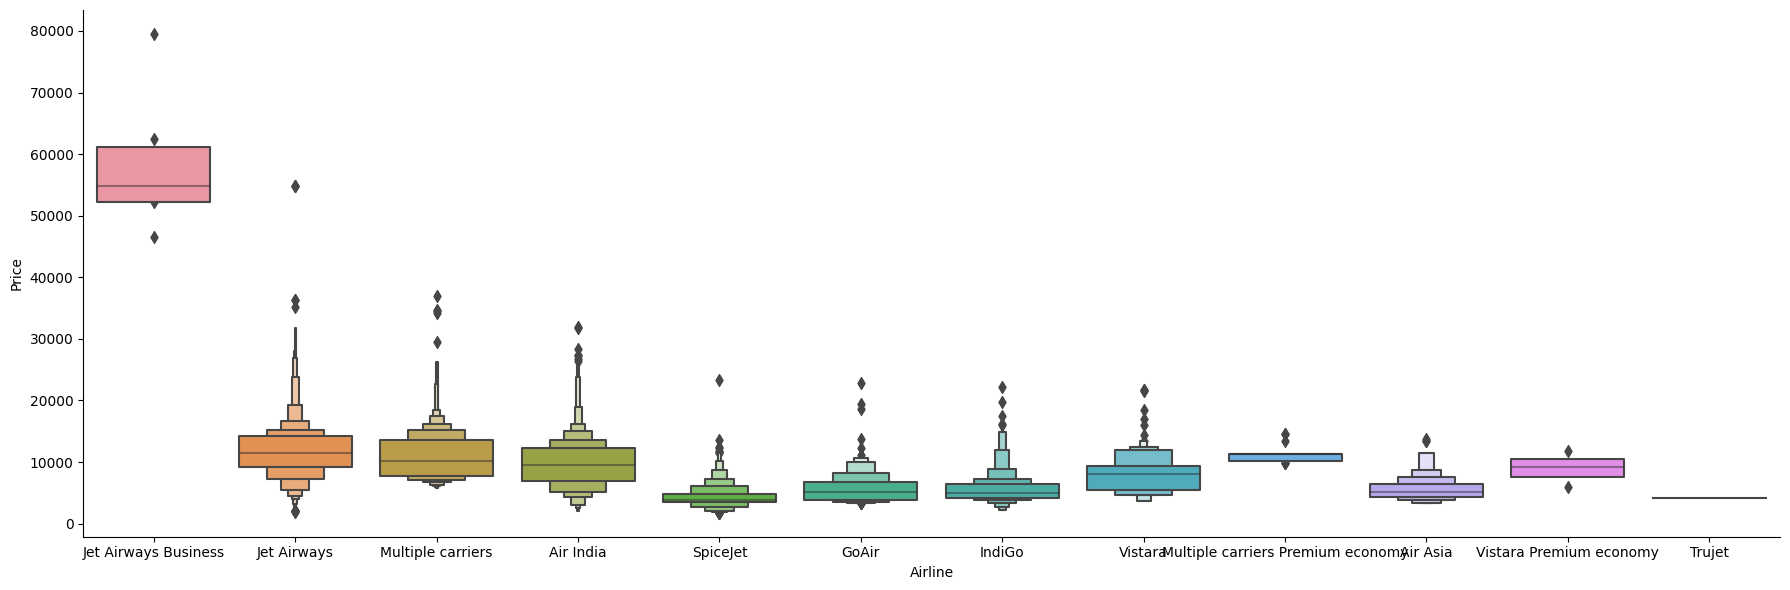

In [74]:
#checking that whic is the costliest airline company according to the dataset.
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median¶


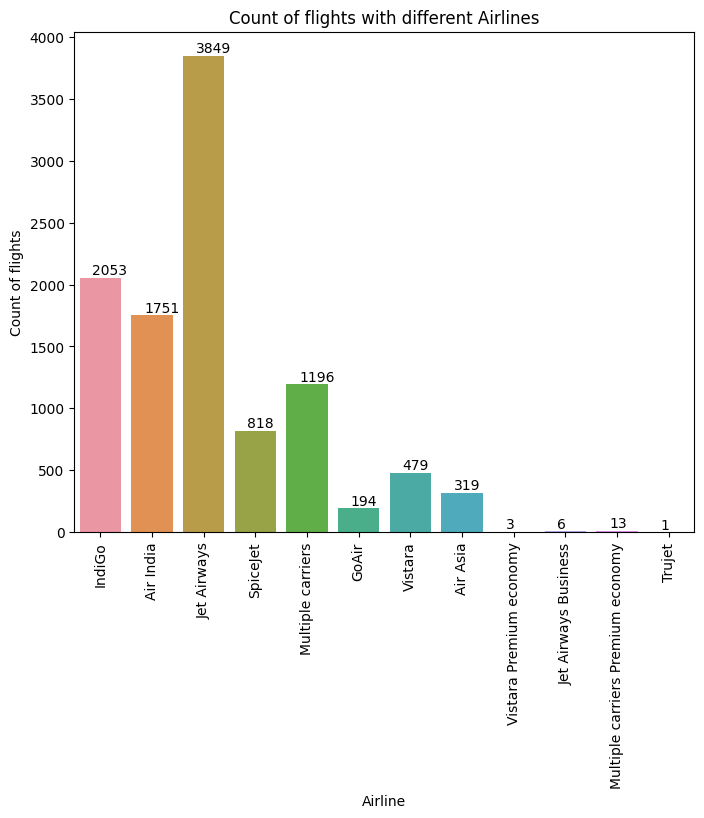

In [75]:
plt.figure(figsize = (8, 6.5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

#### Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

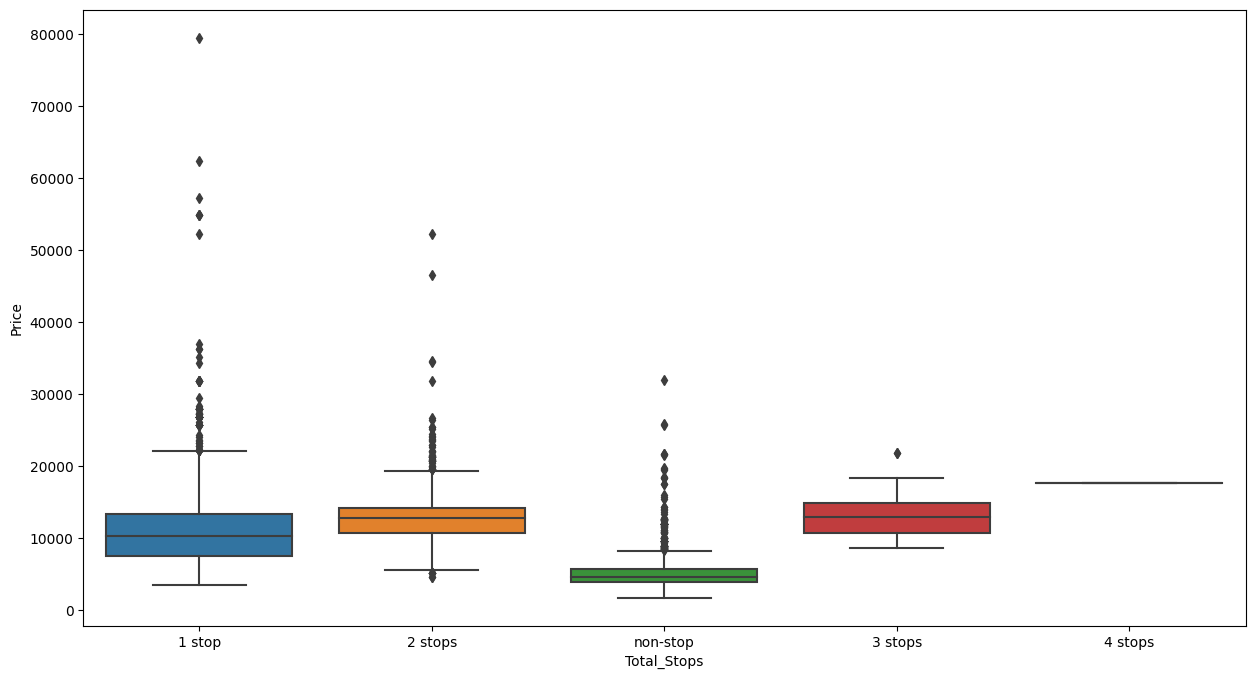

In [76]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_df.sort_values('Price',ascending=False))

## Data Preprocessing

### Analysing Date_of_Journey column

In the training dataset we can see that Date_of Journey column is present our ML algorithm will not be able to understand date format so we have to extract the useful information like Journey_Date and Journey_Month out of this column.

In [77]:
# Extracting the journey day from the Date_of_Journey column
train_df["journey_date"]= pd.to_datetime(train_df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [78]:
# Extracting the journey month from the Date_of_Journey column
train_df["journey_month"]= pd.to_datetime(train_df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [79]:
#Dropping the Date_of_Journey column as we have extracted all the useful information out of it.
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

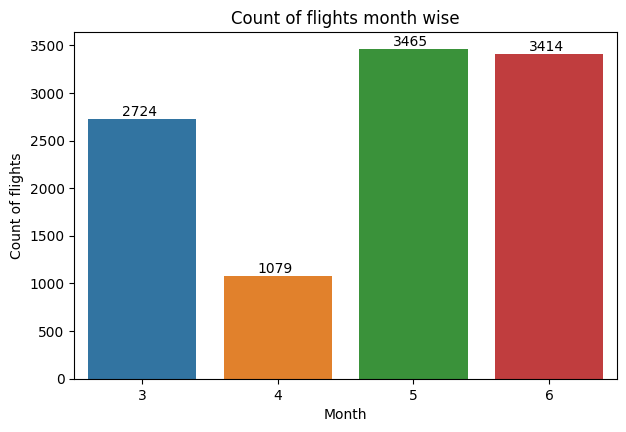

In [80]:
plt.figure(figsize = (7, 4.5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [81]:
# now chekcing the training dataset.
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Analysing Dep_time and Arrival_time column

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns¶

In [82]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=pd.to_datetime(data[col]).dt.hour
    
def extract_min(data,col):
    data[col+'_min']= pd.to_datetime(data[col]).dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [83]:
extract_hour(train_df,'Dep_Time')
extract_hour(train_df,'Arrival_Time')

#extracting minutes
extract_min(train_df,'Dep_Time')
extract_min(train_df,'Arrival_Time')


#drop the column
drop_col(train_df,'Dep_Time')
drop_col(train_df,'Arrival_Time')

In [84]:
# Check for the training data
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,21,50,35


### Analysing Duration column

Here the duration is basically the time difference between the departure time and the arrival time so we have to extract the duration hour and the duration minute from this column and drop the main duration column.

In [85]:
duration = list(train_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

#we will remove the Durtaion column
train_df.drop(['Duration'],axis=1,inplace=True)

In [86]:
#now checking the training dataset
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,50,35,4,45


### One hot encoding for Airline column

In [87]:
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(train_df['Airline'],drop_first=True)

### One hot encoding for Source column

In [88]:
Source = train_df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### One hot encoding for Airline column

In [89]:
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [90]:
# Now checking for the training dataset.
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,50,35,4,45


Here Additional information and Route is not at all the important column so we are going to drop it

In [91]:
train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [92]:
#Nominal encoding of the Total_stops column
train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,21,50,35,4,45


<AxesSubplot:>

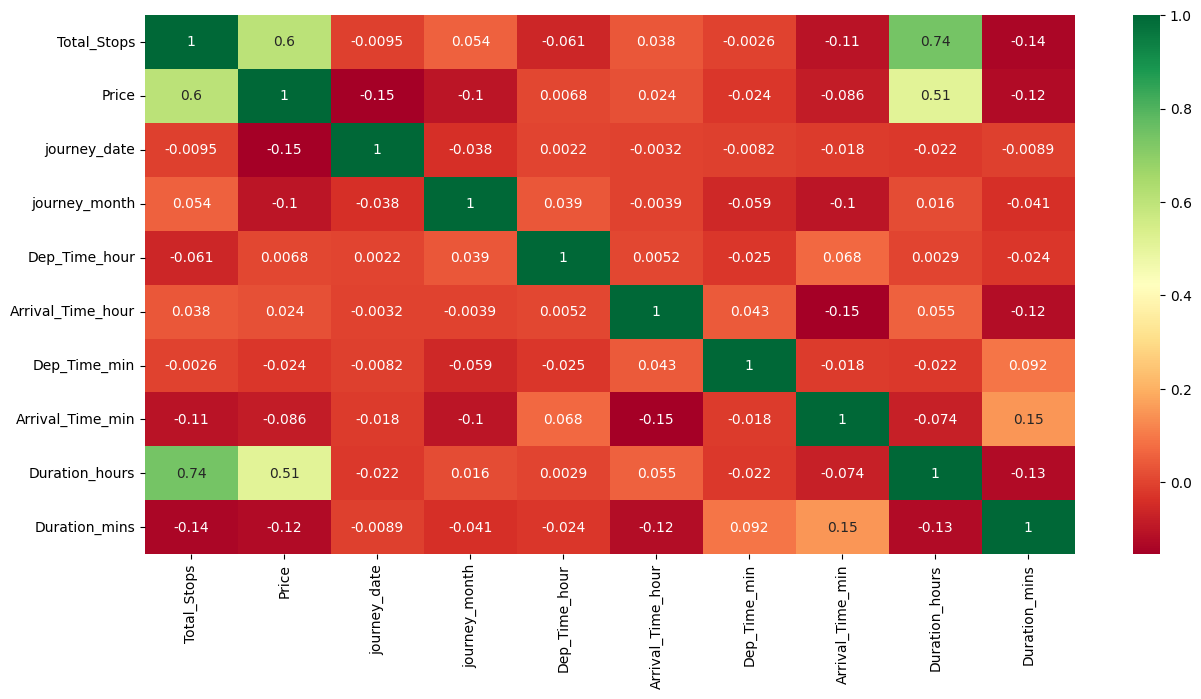

In [93]:
# Checking the multicoolearity of the dataset
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),annot = True, cmap = "RdYlGn")

In [94]:
#Concatenate dataframe --> df+ Airline + Source + Destination
training_df = pd.concat([train_df,Airline , Source, Destination],axis=1)

# we have drop the varibles
training_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
training_df.head()

,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,1,20,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,13,50,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,4,25,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,23,5,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,21,50,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Analysing the test dataset

In [95]:
test_df = pd.read_excel("Dataset/Test_set.xlsx")

In [96]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [97]:
# Preprocessing the testing dataset.

print(test_df.info())

test_df.dropna(inplace = True)
print(test_df.isnull().sum())

# Date_of_Journey
test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey_month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins
test_df.drop(["Duration"], axis = 1, inplace = True)

# Categorical data
print("Airline")
print("-"*75)
print(test_df["Airline"].value_counts())
Airline = pd.get_dummies(test_df["Airline"], drop_first= True)

print(test_df["Source"].value_counts())
Source = pd.get_dummies(test_df["Source"], drop_first= True)

print(test_df["Destination"].value_counts())
Destination = pd.get_dummies(test_df["Destination"], drop_first = True)

test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
testing_data = pd.concat([test_df, Airline, Source, Destination], axis = 1)

testing_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", testing_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

## Dividing the training dataset into features and labels.

In [98]:
y = training_df['Price']

In [99]:
x = training_df[training_df.columns.difference(['Price'])]


In [100]:
x

,Air India,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,...,Source_Delhi,Source_Kolkata,Source_Mumbai,SpiceJet,Total_Stops,Trujet,Vistara,Vistara Premium economy,journey_date,journey_month
0,0,1,10,22,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,24,3
1,1,13,15,5,50,0,0,0,0,0,...,0,1,0,0,2,0,0,0,1,5
2,0,4,25,9,25,1,0,0,0,0,...,1,0,0,0,2,0,0,0,9,6
3,0,23,30,18,5,0,0,0,0,0,...,0,1,0,0,1,0,0,0,12,5
4,0,21,35,16,50,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,22,25,19,55,0,0,0,0,0,...,0,1,0,0,0,0,0,0,9,4
10679,1,23,20,20,45,0,0,0,0,0,...,0,1,0,0,0,0,0,0,27,4
10680,0,11,20,8,20,0,1,0,0,0,...,0,0,0,0,0,0,0,0,27,4
10681,0,14,10,11,30,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,3


## Train Test split

In [101]:
#Splitting the data into the training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state=100)

## Applying the Random Forest Regressor


In [102]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
# calculating the accuracy of the testing data
random_forest_regressor.score(x_test, y_test)

0.8165966259406524

In [104]:
# calculating the accuracy of the traning data
random_forest_regressor.score(x_train, y_train)

0.9542821038411142

In [105]:
y_pred = random_forest_regressor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

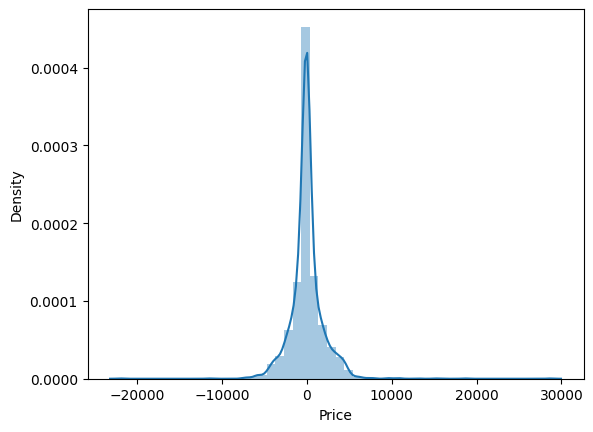

In [106]:
sns.distplot(y_test-y_pred)

In [107]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1188.5145272350574
MSE:  3974394.7411602903
RMSE:  1993.5884081626002


## Hyper-Parameter Tuning


In [108]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [109]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [110]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [111]:
random_forest_regresor=RandomForestRegressor(n_estimators=300,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15)

In [112]:
random_forest_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)

In [113]:
#Accuracy of the trianing data after the hyper-parameter tuning.
random_forest_regresor.score(x_train,y_train)

0.8947564734654891

In [114]:
#Accuracy of the testing data after the hyper-parameter tuning.
random_forest_regresor.score(x_test,y_test)

0.8364801934894469

## Importing the model to pickle file

In [119]:
import gzip, pickle
with gzip.open("flight_fare_prediction.gz", "wb") as f:
    pickle.dump(random_forest_regresor, f)

with gzip.open("flight_fare_prediction.gz", "rb") as f:
    model = pickle.load(f)
model.score(x_test, y_test)

0.8364801934894469